In [72]:
'''
NAME: ADITYA AGRAWAL
ROLL: 2311010
ASSIGN8: LAGUERRE's METHOD
DATE-08/10/2025
'''


"\nNAME: ADITYA AGRAWAL\nROLL: 2311010\nASSIGN8: LAGUERRE's METHOD\nDATE-08/10/2025\n"

In [73]:

import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('c:/Users/mayur/ClonedGitRepo/COMPUTATIONAL_PHYSICS/LABWORK')

import adilib_class as ad
import math

In [74]:
#_______________QUESTION_3________________________
N=20
N_vals=[]
pi_vals=[]
while N <= 10000 :
    outside_circle,outside_circle_index=[],[]
    inside_circle,inside_circle_index=[],[]
    LCG=adi.LCG(N)
    index_f=adi.index_f(N)
    for i in range(N):
        
        if index_f[i]**2 + LCG[i]**2 <= 1 :
            inside_circle.append(LCG[i])
            inside_circle_index.append(index_f[i])
        else:
            outside_circle.append(LCG[i])
            outside_circle_index.append(index_f[i])
    pi=(4/N)*len(inside_circle)
    pi_vals.append(pi)
    N_vals.append(N)
    N+=1
print("Last_pi_val= ",pi_vals[-1],"....  Average_pi_val= ",np.mean(pi_vals),"....  Original_pi_val = ",np.pi)
plt.plot(N_vals,pi_vals,marker='o',linestyle='none',color='b')
plt.savefig("Monte_carlo_Pi.png")
plt.show()


NameError: name 'adi' is not defined

Reached <5% error at N=300: Estimated area=6.08000,Error=3.23%


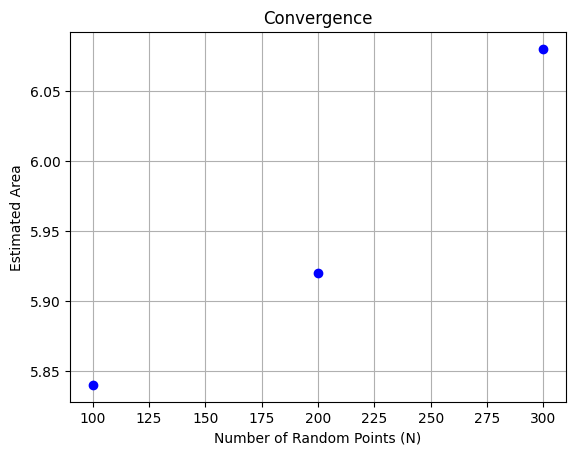

In [ ]:
# Monte Carlo estimation of ellipse area using self-made LCG
a=2
b=1
analytical_area=math.pi*a*b

N=100
N_vals=[]
area_vals=[]
error_vals=[]
within_5_percent=False

while N<=100000 and not within_5_percent:
    # Generate random points in rectangle [-a, a] x [-b, b]
    rand_x = ad.RandomNumbers.pRNG_LCG(N, s=0.1)
    rand_y = ad.RandomNumbers.pRNG_LCG(N, s=0.7)  # Different seed for y
    x_vals = [2 * a * (rx - 0.5) for rx in rand_x]
    y_vals = [2 * b * (ry - 0.5) for ry in rand_y]
    inside = 0
    for x, y in zip(x_vals, y_vals):
        if (x/a)**2+(y/b)**2<=1:
            inside+=1
    rect_area=4*a*b
    est_area=rect_area*inside/N
    error=abs(est_area-analytical_area)/analytical_area*100
    N_vals.append(N)
    area_vals.append(est_area)
    error_vals.append(error)
    if error<5:
        within_5_percent=True
        print(f"Reached <5% error at N={N}: Estimated area={est_area:.5f},Error={error:.2f}%")
    N += 100

ad.Visualization.plot(N_vals,area_vals,"Convergence","Number of Random Points (N)","Estimated Area","montecarlo_plot.png")

In [ ]:
#using newton raphson method,solve...(x-5)e^x + 5 = 0
def f(x):
    return (x-5)*math.exp(x)+5
def df(x):
    return (x-4)*math.exp(x)
x0=4.5
x,listt=ad.Roots.NewtonRaphson(f,df,x0,0.0001,100)

h=6.626e-34
c=3e8
k=1.381e-23

#weins constant upto 2 decimal places in scientific notation
b=(h*c)/(k*x)
print("\n\n\nWeins constant is:",format(b,".2e"))

Total Iterations(new-raph):- 6 4.965114231744279 
f(root=) 3.2951419370874646e-13



Weins constant is: 2.90e-03


In [ ]:
#___________QUESTION3______________
#find inverse using ludecomposition method
matrix3=[
    [.2,-5,3,.4,0],
    [-.5,1,7,-2,.3],
    [.6,2,-4,3,.1],
    [3,.8,2,-.4,3],
    [.5,3,2,.4,1]
]
I=[
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,0,1,0,0],
    [0,0,0,1,0],
    [0,0,0,0,1]
]
#LU decomposition
result= ad.LinearSystems.solve_by_lu(matrix3, I)
#printing the result(rounded to 3 decimal places)
print("Inverse of the matrix using LU decomposition:")
for row in result:
    print([round(elem, 3) for elem in row])

LU decomposition successful
Forward Substitution: Solving L*y=B
Backward Substitution: Solving U*x=y
Inverse of the matrix using LU decomposition:
[-0.708, 2.531, 2.431, 0.967, -3.902]
[-0.193, 0.31, 0.279, 0.058, -0.294]
[0.022, 0.365, 0.286, 0.051, -0.29]
[0.273, -0.13, 0.132, -0.141, 0.449]
[0.782, -2.875, -2.679, -0.701, 4.234]


In [ ]:
#_____QUESTION4______________________
#using gauss sidel method solve Ax=B
#_____________________________________
A = ad.MatrixOperations.readd("matrixA.txt")
A=[
[-2  ,  0  ,  0   , -1  ,  0  ,  0.5],
[ 0 ,   4   , 0.5  , 0  ,  1  ,  0],
[ 0  ,  0.5 , 1.5 ,  0  ,  0  ,  0],
[-1  ,  0  ,  0   , -2  ,  0  ,  1],
 [0   , 1  ,  0  ,   0  , -2.5 , 0],
 [0.5 , 0  ,  0   ,  1  ,  0   ,-3.75]
]
print("\nMatrix A:")
for row in A:
    print([f"{val:.2f}" for val in row])
B = ad.MatrixOperations.readd("vectorB.txt")
B=[-1,0,2.75,2.5,-3,2]
print("\nVector B:", [f"{val:.2f}" for val in B])
x,iterations,_=ad.LinearSystems.gauss_seidel_iteration(A,B)

print("\nSolution x (Gauss-Seidel):", [f"{val:.6f}" for val in x])


Matrix A:
['-2.00', '0.00', '0.00', '-1.00', '0.00', '0.50']
['0.00', '4.00', '0.50', '0.00', '1.00', '0.00']
['0.00', '0.50', '1.50', '0.00', '0.00', '0.00']
['-1.00', '0.00', '0.00', '-2.00', '0.00', '1.00']
['0.00', '1.00', '0.00', '0.00', '-2.50', '0.00']
['0.50', '0.00', '0.00', '1.00', '0.00', '-3.75']

Vector B: ['-1.00', '0.00', '2.75', '2.50', '-3.00', '2.00']
Gauss-Seidel Iteration Method
Iter	x[0]	x[1]	x[2]	x[3]	x[4]	x[5]	Error
0	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	---
1	0.5000	0.0000	1.8333	-1.5000	1.2000	-0.8667	1.833333
2	1.0333	-0.5292	2.0097	-2.2000	0.9883	-0.9822	0.700000
3	1.3544	-0.4983	1.9994	-2.4183	1.0007	-0.9976	0.321111
4	1.4598	-0.5001	2.0000	-2.4787	1.0000	-0.9997	0.105315
5	1.4894	-0.5000	2.0000	-2.4946	1.0000	-1.0000	0.029667
6	1.4973	-0.5000	2.0000	-2.4986	1.0000	-1.0000	0.007862
7	1.4993	-0.5000	2.0000	-2.4997	1.0000	-1.0000	0.002025
8	1.4998	-0.5000	2.0000	-2.4999	1.0000	-1.0000	0.000514
9	1.5000	-0.5000	2.0000	-2.5000	1.0000	-1.0000	0.000130
10	1.